In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ex2.csv', encoding= 'unicode_escape')

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Cleaning

In [22]:
import re
df['StockCode'] = df['StockCode'].map(lambda x: re.sub('\D', '', x))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [27]:
df = df.dropna()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Revenue      406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 47.2+ MB


## Data Preparation

In [29]:
df['Revenue'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [34]:
monetary = df.groupby('CustomerID')['Revenue'].sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [38]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [42]:
from datetime import date

In [48]:
recency = df.groupby('CustomerID')['InvoiceDate'].max()
recency = recency.reset_index()
recent_date = recency['InvoiceDate'].max()
recency['Recency'] = recency['InvoiceDate'].apply(
    lambda x: (recent_date - x).days)
recency.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,326
1,12347.0,2011-10-31 12:25:00,40
2,12348.0,2011-09-25 13:13:00,76
3,12349.0,2011-11-21 09:51:00,19
4,12350.0,2011-02-02 16:01:00,311


In [50]:
rfm = pd.merge(recency, frequency, on='CustomerID', how='inner')
rfm = pd.merge(rfm, monetary, on='CustomerID', how='inner').drop(columns='InvoiceDate')
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,40,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40


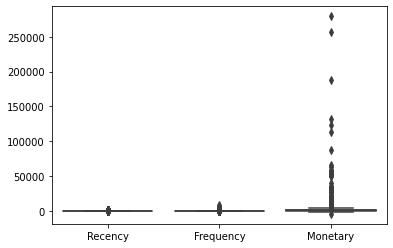

In [65]:
rfm1 = rfm.drop(columns='CustomerID')
sns.boxplot(data=rfm1)

In [69]:
rfm1.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,100.947850,93.053294,1898.459701
std,113.928875,232.471608,8219.345141
min,0.000000,1.000000,-4287.630000
25%,20.000000,17.000000,293.362500
50%,57.000000,42.000000,648.075000
75%,152.000000,102.000000,1611.725000
max,697.000000,7983.000000,279489.020000


In [54]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [66]:
scaler = StandardScaler()
x_scaled=scaler.fit(rfm1)
x_scaled = scaler.fit_transform(rfm1)
x_scaled

array([[ 1.97560006, -0.3917197 , -0.23100099],
       [-0.53502522,  0.38265697,  0.29343167],
       [-0.21900246, -0.26695902, -0.01231622],
       ...,
       [-0.06976949, -0.34439668, -0.20951263],
       [-0.79837752,  2.85205812,  0.02390005],
       [-0.88616162, -0.0991774 , -0.00744423]])

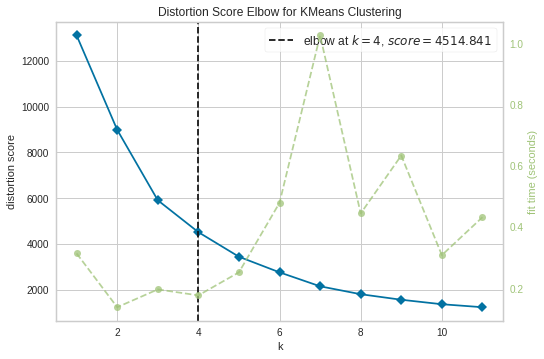

In [68]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()

4 clusters looks good.

[0 0 0 ... 0 0 0]
 Our cluster centers are as follows
[[-4.74765231e-01  5.52402320e-02  1.51675570e-02]
 [-8.51047980e-01  2.50422518e+01  7.65089359e+00]
 [-8.12422976e-01  3.95941676e+00  2.31438329e+01]
 [ 1.42895914e+00 -2.75326822e-01 -1.79428405e-01]]


,Recency,Frequency,Monetary
cluster_pred,,,
0,3268,3268,3268
1,4,4,4
2,5,5,5
3,1095,1095,1095


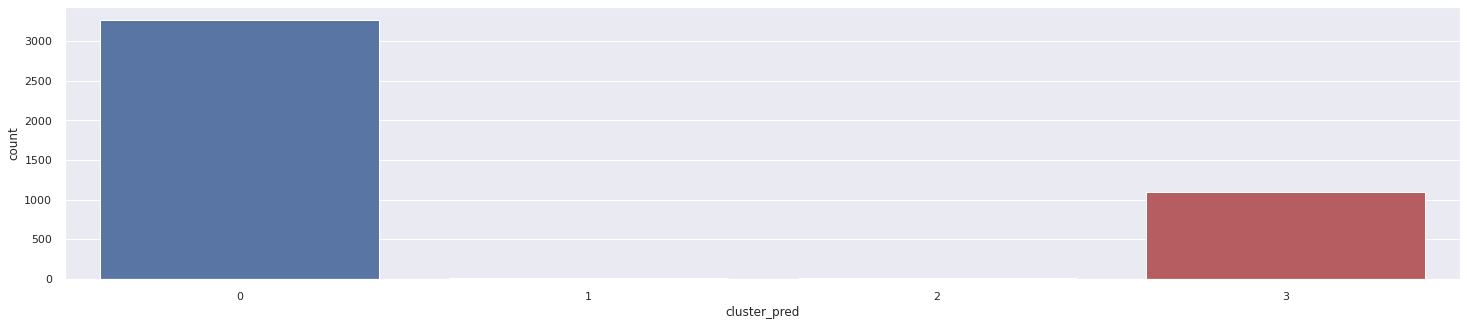

In [71]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm1)
clusters_scaled = rfm1.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()